In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


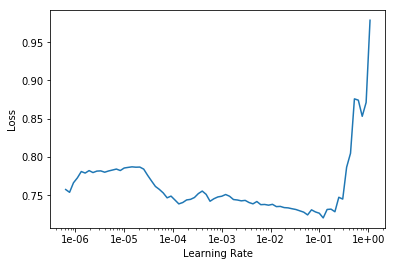

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.732584    0.708703    0.449275  (00:07)
2      0.681899    0.741844    0.463768  (00:07)
3      0.645549    0.705225    0.545894  (00:07)
4      0.672555    0.682481    0.618357  (00:06)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:05
epoch  train_loss  valid_loss  accuracy
1      0.636113    0.608156    0.714976  (00:19)
2      0.647110    0.631140    0.695652  (00:15)
3      0.575855    0.538876    0.772947  (00:19)
4      0.558041    0.580966    0.739130  (00:18)
5      0.538643    0.487860    0.792271  (00:19)
6      0.522891    0.507232    0.792271  (00:17)
7      0.465180    0.489226    0.821256  (00:20)
8      0.456873    0.460615    0.806763  (00:20)
9      0.453765    0.459347    0.801932  (00:17)
10     0.433592    0.397992    0.855072  (00:19)
11     0.432152    0.408207    0.830918  (00:16)
12     0.388695    0.383873    0.826087  (00:18)
13     0.359304    0.375961    0.845411  (00:19)
14     0.394020    0.366597    0.850242  (00:16)
15     0.346360    0.337200    0.869565  (00:20)
16     0.360739    0.341371    0.859903  (00:16)
17     0.359856    0.363272    0.840580  (00:16)
18     0.359008    0.369801    0.835749  (00:16)
19     0.353419    0.391859    0.830918  (00:16)
20     0.31

In [11]:
learn.validate()

[0.33439997, tensor(0.8599)]

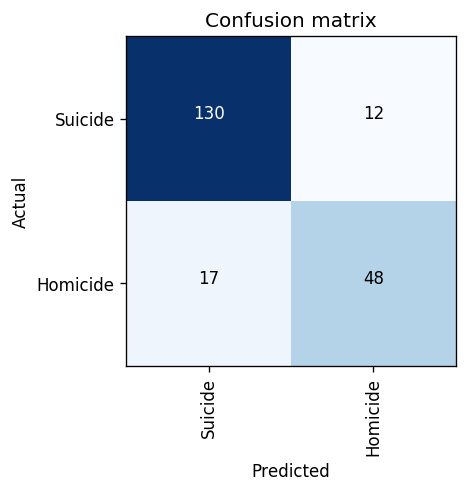

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

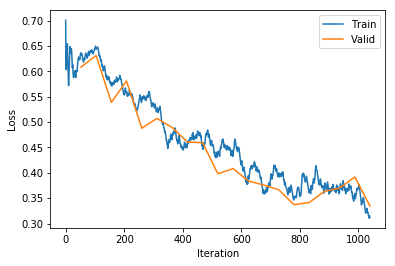

In [13]:
learn.recorder.plot_losses()

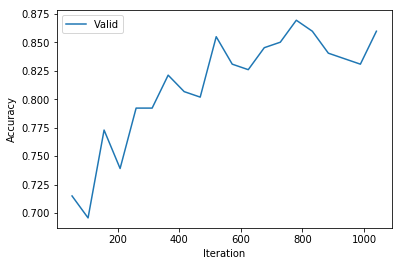

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


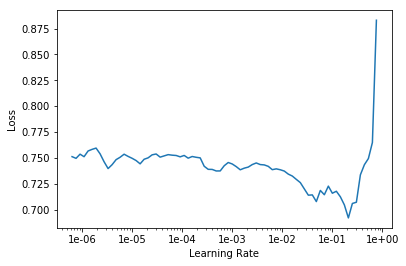

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:25
epoch  train_loss  valid_loss  accuracy
1      0.728646    0.631982    0.714976  (00:06)
2      0.693181    0.625225    0.685990  (00:06)
3      0.676485    0.641507    0.628019  (00:06)
4      0.648809    0.624100    0.647343  (00:06)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:08
epoch  train_loss  valid_loss  accuracy
1      0.610112    0.639849    0.657005  (00:18)
2      0.610185    0.563228    0.753623  (00:17)
3      0.552766    0.528367    0.777778  (00:19)
4      0.531981    0.459990    0.806763  (00:18)
5      0.510929    0.435060    0.806763  (00:18)
6      0.487680    0.406741    0.850242  (00:19)
7      0.460061    0.405716    0.826087  (00:20)
8      0.450280    0.442401    0.840580  (00:18)
9      0.476424    0.446257    0.811594  (00:15)
10     0.428081    0.408507    0.826087  (00:18)
11     0.422071    0.416355    0.850242  (00:18)
12     0.415346    0.375888    0.850242  (00:16)
13     0.401069    0.584640    0.787440  (00:18)
14     0.403060    0.337047    0.869565  (00:16)
15     0.366349    0.369113    0.850242  (00:18)
16     0.365044    0.371159    0.884058  (00:17)
17     0.335110    0.387700    0.855072  (00:18)
18     0.318582    0.318150    0.855072  (00:19)
19     0.329519    0.319284    0.869565  (00:16)
20     0.27

In [20]:
learn.validate()

[0.326154, tensor(0.8309)]

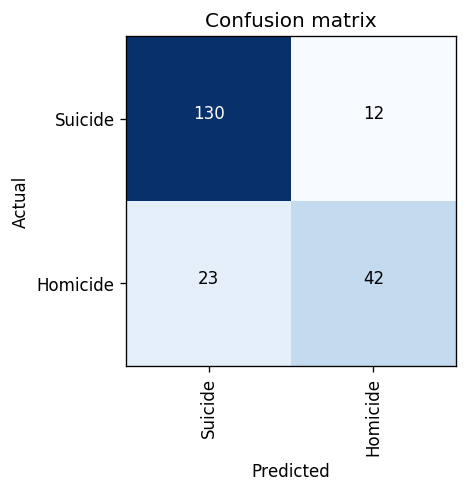

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

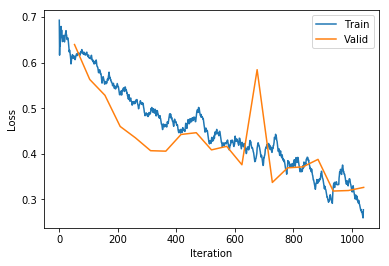

In [22]:
learn.recorder.plot_losses()

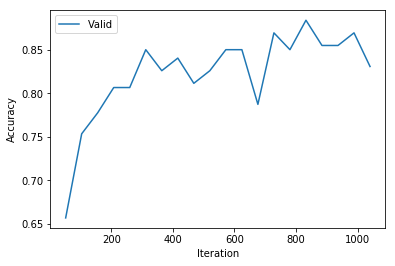

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


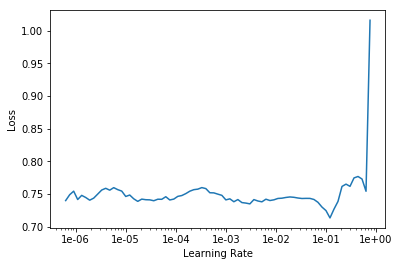

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.742488    0.716238    0.347826  (00:05)
2      0.720224    0.705567    0.492754  (00:06)
3      0.700189    0.667670    0.579710  (00:06)
4      0.679557    0.674879    0.570048  (00:06)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:04
epoch  train_loss  valid_loss  accuracy
1      0.648284    0.671701    0.599034  (00:17)
2      0.649658    0.639493    0.690821  (00:15)
3      0.592058    0.618766    0.690821  (00:20)
4      0.557199    0.573229    0.782609  (00:20)
5      0.529612    0.639198    0.695652  (00:20)
6      0.482221    0.613652    0.714976  (00:20)
7      0.518979    0.511426    0.777778  (00:16)
8      0.485631    0.577639    0.758454  (00:17)
9      0.457693    0.493352    0.797101  (00:18)
10     0.456463    0.539632    0.792271  (00:18)
11     0.442877    0.461517    0.811594  (00:18)
12     0.403984    0.518683    0.816425  (00:19)
13     0.405549    0.401865    0.806763  (00:17)
14     0.403215    0.492788    0.845411  (00:18)
15     0.367586    0.415406    0.826087  (00:18)
16     0.361485    0.501285    0.835749  (00:17)
17     0.332604    0.439497    0.850242  (00:19)
18     0.362183    0.492095    0.826087  (00:16)
19     0.363474    0.367017    0.830918  (00:16)
20     0.35

In [29]:
learn.validate()

[0.37920737, tensor(0.8164)]

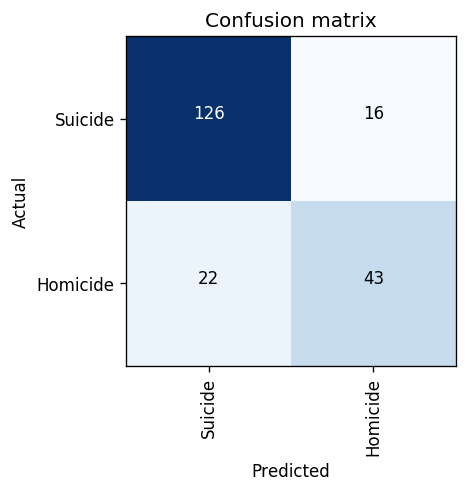

In [30]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

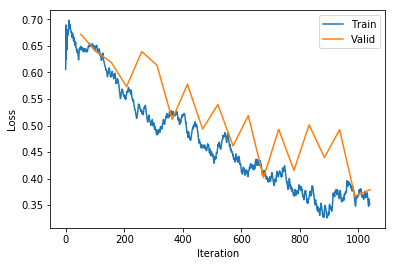

In [31]:
learn.recorder.plot_losses()

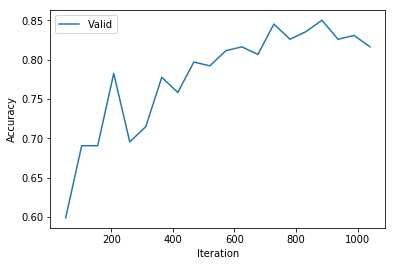

In [32]:
learn.recorder.plot_metrics()

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


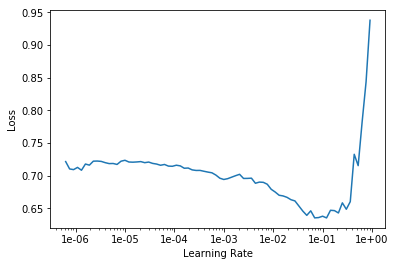

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.684698    0.603162    0.700483  (00:06)
2      0.619917    0.644904    0.599034  (00:07)
3      0.625548    0.620068    0.676328  (00:06)
4      0.593109    0.616790    0.676328  (00:07)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:05
epoch  train_loss  valid_loss  accuracy
1      0.586523    0.576335    0.743961  (00:20)
2      0.604831    0.502827    0.782609  (00:16)
3      0.550448    0.468964    0.835749  (00:20)
4      0.533158    0.458178    0.816425  (00:18)
5      0.481102    0.438811    0.777778  (00:20)
6      0.455346    0.408476    0.811594  (00:19)
7      0.498581    0.411465    0.840580  (00:16)
8      0.493284    0.424622    0.845411  (00:16)
9      0.457408    0.401312    0.840580  (00:17)
10     0.374214    0.358917    0.864734  (00:21)
11     0.392447    0.341034    0.826087  (00:17)
12     0.351519    0.348616    0.864734  (00:19)
13     0.340438    0.330333    0.855072  (00:19)
14     0.403063    0.488997    0.821256  (00:15)
15     0.381308    0.407486    0.850242  (00:16)
16     0.315288    0.528648    0.811594  (00:20)
17     0.318706    0.334490    0.864734  (00:17)
18     0.325447    0.404104    0.840580  (00:17)
19     0.344543    0.355204    0.850242  (00:16)
20     0.34

In [38]:
learn.validate()

[0.43268877, tensor(0.8357)]

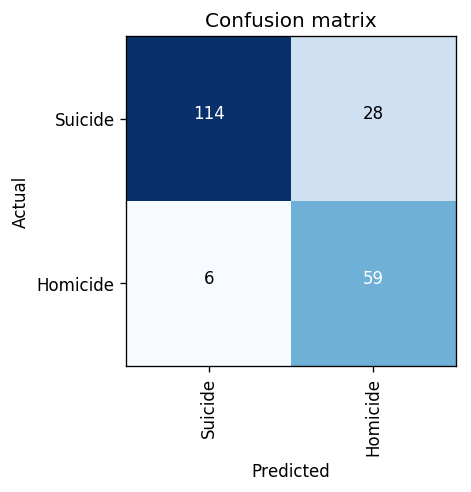

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

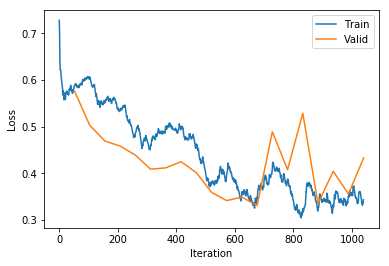

In [40]:
learn.recorder.plot_losses()

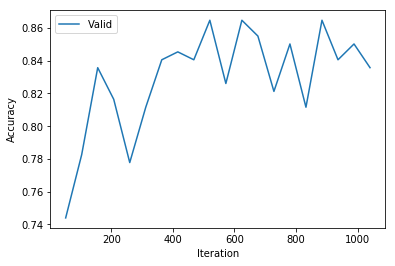

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


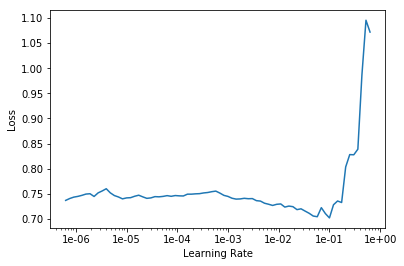

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.736567    0.680424    0.550725  (00:06)
2      0.695352    0.648817    0.618357  (00:06)
3      0.673015    0.639595    0.623188  (00:07)
4      0.623223    0.649963    0.637681  (00:07)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:04
epoch  train_loss  valid_loss  accuracy
1      0.667858    0.718403    0.579710  (00:16)
2      0.615022    0.716064    0.603865  (00:16)
3      0.590585    0.447810    0.792271  (00:19)
4      0.577569    0.488949    0.811594  (00:16)
5      0.560371    0.539378    0.748792  (00:18)
6      0.508266    0.572310    0.710145  (00:18)
7      0.500549    0.462313    0.806763  (00:18)
8      0.452784    0.491300    0.797101  (00:20)
9      0.454851    0.445925    0.821256  (00:16)
10     0.394144    0.495407    0.792271  (00:20)
11     0.335667    0.480955    0.801932  (00:21)
12     0.388025    0.456233    0.816425  (00:15)
13     0.405858    0.357462    0.835749  (00:16)
14     0.405548    0.431963    0.840580  (00:17)
15     0.356842    0.434975    0.821256  (00:19)
16     0.335099    0.376163    0.855072  (00:17)
17     0.318598    0.426771    0.850242  (00:18)
18     0.254226    0.427189    0.826087  (00:20)
19     0.286142    0.381850    0.850242  (00:19)
20     0.32

In [47]:
learn.validate()

[0.47908175, tensor(0.8309)]

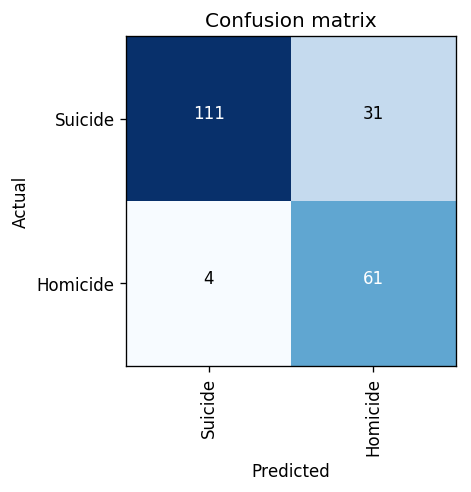

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

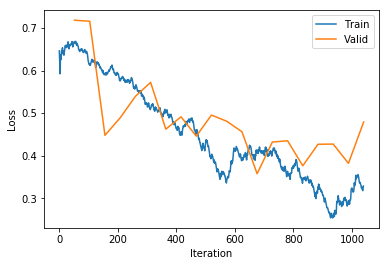

In [49]:
learn.recorder.plot_losses()

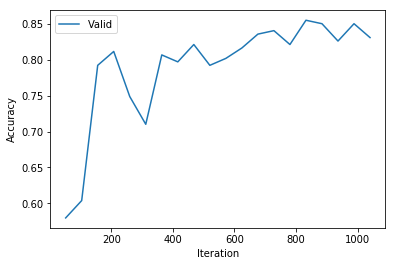

In [50]:
learn.recorder.plot_metrics()

In [51]:
print(accuracy_list)

[0.8599033951759338, 0.8309178948402405, 0.8164251446723938, 0.8357487916946411, 0.8309178948402405]


In [52]:
print(sum(accuracy_list)/len(accuracy_list))

0.83478262424469


In [53]:
#We are now done doing 5-fold cross validation 

In [54]:
#Now train with all the training data and evaluate with the test data

In [55]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()


In [56]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.668040    0.602777    0.718147  (00:08)
2      0.652892    0.592039    0.671815  (00:08)
3      0.641374    0.574027    0.745174  (00:07)
4      0.623731    0.578893    0.698842  (00:08)



In [57]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:35
epoch  train_loss  valid_loss  accuracy
1      0.575357    0.574349    0.756757  (00:22)
2      0.599158    0.523327    0.799228  (00:19)
3      0.541912    0.521329    0.783784  (00:23)
4      0.537758    0.453123    0.818533  (00:20)
5      0.471768    0.531992    0.776062  (00:26)
6      0.468786    0.450405    0.822394  (00:22)
7      0.423664    0.348661    0.861004  (00:24)
8      0.440084    0.381531    0.868726  (00:21)
9      0.465452    0.350528    0.868726  (00:19)
10     0.417868    0.328630    0.853282  (00:24)
11     0.366790    0.331148    0.861004  (00:24)
12     0.369568    0.330945    0.857143  (00:23)
13     0.323135    0.288860    0.884170  (00:24)
14     0.346743    0.354608    0.872587  (00:22)
15     0.307262    0.293789    0.884170  (00:24)
16     0.304158    0.323420    0.876448  (00:22)
17     0.359605    0.290150    0.899614  (00:20)
18     0.280388    0.316485    0.861004  (00:25)
19     0.301316    0.339466    0.853282  (00:21)
20     0.31

In [58]:
learn.validate()

[0.33660722, tensor(0.8687)]

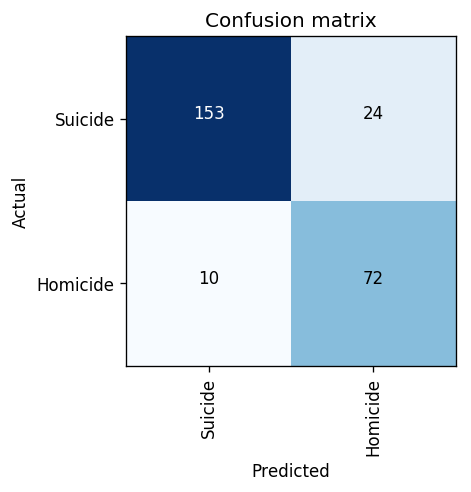

In [59]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [60]:
import torch

torch.cuda.empty_cache()